In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x=pd.read_csv('logistic_x.txt',sep='\ +',header=None,engine='python')
y=pd.read_csv('logistic_y.txt',sep='\ +',header=None,engine='python')
y=y.astype(int)
x['label']=y[0].values

先看一下数据

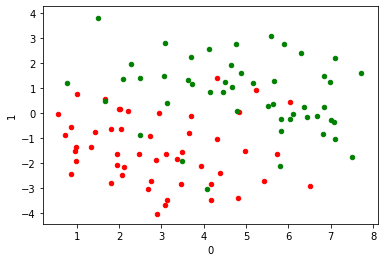

In [3]:
ax=plt.axes()
x.query('label == -1').plot.scatter(x=0,y=1, ax=ax, color='red')
x.query('label == 1').plot.scatter(x=0,y=1, ax=ax, color='green')

在xs左边加一列1作为x0并把y的-1改成0

In [4]:
xs=x[[0,1]].values
lr=0.2
ys=x['label'].values
xs=np.hstack([np.ones([xs.shape[0],1]),xs])
ys=np.clip(ys,0,1)

算法主体，基于博客中的更新规则，这里采用了stochastic gradient ascend来逼近

In [5]:
thetas=[]
theta=np.ones(xs.shape[1])
loss=1e9
iteration=0
while loss>1e-3:
    old_theta=theta.copy()
    for j in range(xs.shape[1]):
        for i in range(xs.shape[0]):
            fexp=1+np.exp(-theta.dot(xs[i,:].T))
            delta=lr*((ys[i])-(1/fexp))*xs[i,j]
            theta[j]+=delta
    if(iteration%30==0):
        thetas.append(theta.copy())
    iteration+=1
    loss=np.sum(np.abs(theta-old_theta))
print(iteration)

328


第328个iteration收敛，看一下数据和模型的拟合情况

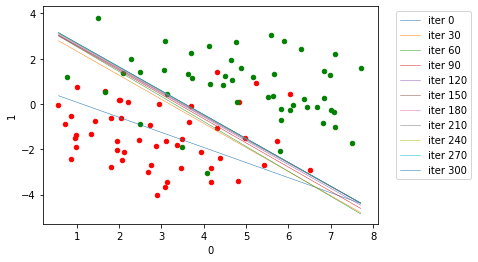

In [6]:
ax=plt.axes()
x.query('label == -1').plot.scatter(x=0,y=1, ax=ax, color='red')
x.query('label == 1').plot.scatter(x=0,y=1, ax=ax, color='green')
_xs = np.array([np.min(xs[:,1]), np.max(xs[:,1])])
for k, theta in enumerate(thetas):
    _ys = (theta[0] + theta[1] * _xs) / (- theta[2])
    plt.plot(_xs, _ys, label='iter {0}'.format(30*k), lw=0.5)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")